In [1]:
from model import *
import matplotlib.pyplot as plt
import time

def get_negative_samples(model, call_back=0.5):
    """Get the negative samples from model for visualization

    Args:
        model (Net): the instance of Net
        call_back (float, optional): the call_back rate for positive sampling.

    Returns:
        negative: the negative plot set
    """
    # Calculate the prediction
    positive = []
    negative = []
    for x in np.linspace(-6,6,100):
        for y in np.linspace(-6,6,100):
            pos = [x,y]
            if model.forward(pos) > call_back:
                positive.append(pos)
            else:
                negative.append(pos)
    positive = np.array(positive)
    negative = np.array(negative)
    return negative

## MLQP

In [6]:
def visualize_boundary(model):
    """Visualize the boundary of the model

    Args:
        model (Net): the instance of Net
    """

    negative = get_negative_samples(model)
    
    plt.figure(figsize=(5,5))
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.scatter(negative[:,0],negative[:,1],8,"black")
    plt.show()

In [4]:
def plot_error(model):
    """Plot the error log from model

    Args:
        model (Net): the instance of Net
    """
    logs = np.array(model.logs)
    plt.figure()
    plt.plot(logs[:,0],logs[:,1],label="train")
    plt.plot(logs[:,0],logs[:,2],label="val")
    if len(logs[0]) > 3:
        plt.plot(logs[:,0],logs[:,3],label="test")
    plt.legend()
    plt.show()

In [5]:
net = Net(0.1)

train_data = read_data("../two_spiral_train_data.txt")
test_data = read_data("../two_spiral_test_data.txt")

net = train(net, train_data, 5000, test_data)

Early Stop  250 | T 0.1217 | V 0.1184:   9%|▉         | 450/5000 [00:24<04:04, 18.60epoch/s]


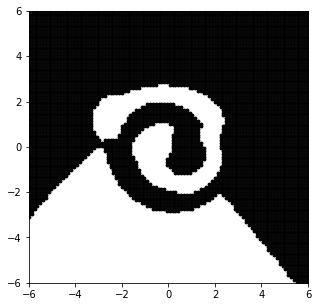

In [6]:
visualize_boundary(net)

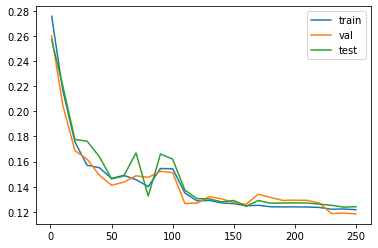

In [7]:
plot_error(net)

Early Stop 1770 | T 0.0437 | V 0.0477:  49%|████▉     | 1970/4000 [01:48<01:51, 18.21epoch/s]
Early Stop 1500 | T 0.1036 | V 0.1025:  42%|████▎     | 1700/4000 [01:37<02:12, 17.37epoch/s]
Early Stop 1220 | T 0.0425 | V 0.0392:  36%|███▌      | 1420/4000 [01:25<02:34, 16.66epoch/s]
Early Stop 1760 | T 0.0855 | V 0.0862:  49%|████▉     | 1960/4000 [01:55<02:00, 16.98epoch/s]
Early Stop 2110 | T 0.0766 | V 0.0761:  58%|█████▊    | 2310/4000 [02:14<01:38, 17.12epoch/s]


lr 0.01 | Avg Time  108s | Avg Test Error 0.1227


Early Stop 3240 | T 0.0904 | V 0.0891:  86%|████████▌ | 3440/4000 [03:26<00:33, 16.66epoch/s]
Early Stop  370 | T 0.1032 | V 0.1030:  14%|█▍        | 570/4000 [00:33<03:20, 17.14epoch/s]
Early Stop  790 | T 0.0995 | V 0.0984:  25%|██▍       | 990/4000 [00:58<02:57, 16.96epoch/s]
Early Stop  610 | T 0.0835 | V 0.0823:  20%|██        | 810/4000 [00:46<03:05, 17.24epoch/s]
Early Stop  420 | T 0.0851 | V 0.0847:  16%|█▌        | 620/4000 [00:36<03:17, 17.10epoch/s]
Early Stop 2860 | T 0.0825 | V 0.0755:  76%|███████▋  | 3060/4000 [03:00<00:55, 16.96epoch/s]


lr 0.05 | Avg Time   71s | Avg Test Error 0.1188


Early Stop 2310 | T 0.0917 | V 0.0894:  63%|██████▎   | 2510/4000 [02:29<01:28, 16.79epoch/s]
Early Stop   70 | T 0.1282 | V 0.1190:   7%|▋         | 270/4000 [00:16<03:44, 16.62epoch/s]
Early Stop  820 | T 0.1060 | V 0.1049:  26%|██▌       | 1020/4000 [00:59<02:53, 17.17epoch/s]
Early Stop  450 | T 0.1236 | V 0.1091:  16%|█▋        | 650/4000 [00:40<03:28, 16.08epoch/s]
Early Stop  180 | T 0.1216 | V 0.1237:  10%|▉         | 380/4000 [00:22<03:33, 16.99epoch/s]
Early Stop  210 | T 0.1282 | V 0.1181:  10%|█         | 410/4000 [00:24<03:30, 17.06epoch/s]


lr 0.10 | Avg Time   32s | Avg Test Error 0.1303


Early Stop  400 | T 0.1191 | V 0.1066:  15%|█▌        | 600/4000 [00:35<03:21, 16.86epoch/s]


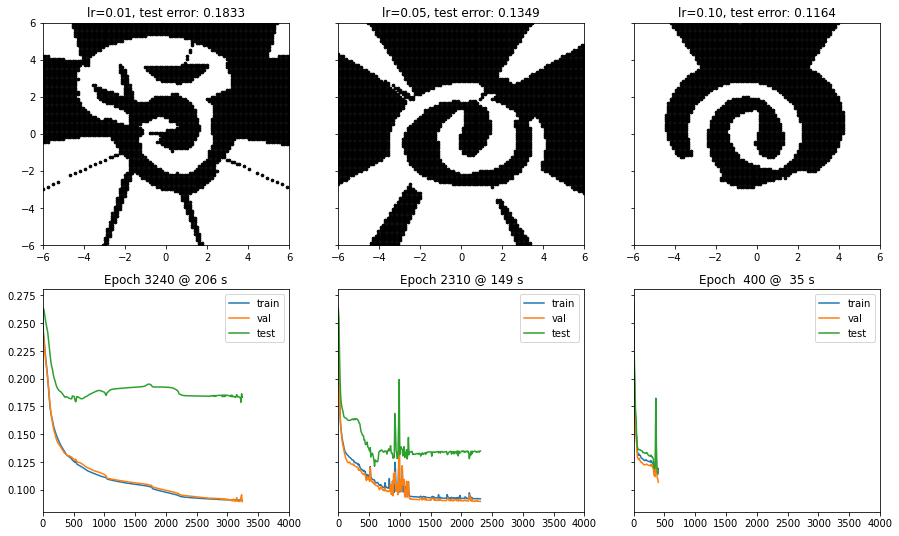

In [8]:
# benchmark

train_data = read_data("../two_spiral_train_data.txt")
test_data = read_data("../two_spiral_test_data.txt")

RANDOM_SEED = 42
EPOCH_THRESHOLD = 4000

fig, ax = plt.subplots(2, 3, sharey='row', figsize=(15,9))

for i, lr in enumerate([0.01, 0.05, 0.1]):
    # calcute the average training time.
    sum_time = 0.0
    sum_error = 0.0
    for random_seed in [57, 79, 131, 157, 201]:
        net = Net(lr, 0.8, random_seed)
        start_time = time.time()
        train(net, train_data, EPOCH_THRESHOLD)
        elapsed_time = time.time() - start_time
        test_error = test(net, test_data)
        sum_time += elapsed_time
        sum_error += test_error
    print("lr %.2f | Avg Time %4ds | Avg Test Error %.4f" % (lr, sum_time / 5, sum_error / 5))

    # visualize decision boundaries at a given random seed.
    # NOTE: it is not in the part of benchmark
    # since the tracking on test_data is used
    # which may increase the time it processes.
    net = Net(lr, 0.8, RANDOM_SEED)
    start_time = time.time()
    net = train(net, train_data, EPOCH_THRESHOLD, test_data)
    elapsed_time = time.time() - start_time
    test_error = test(net, test_data)

    # visualize
    ax[0,i].set_title("lr=%.2f, test error: %.4f" % (lr, test_error))
    negative = get_negative_samples(net)
    ax[0,i].set_xlim(-6,6)
    ax[0,i].set_ylim(-6,6)
    ax[0,i].scatter(negative[:,0],negative[:,1],7,"black")

    # error
    logs = np.array(net.logs)
    ax[1,i].set_title("Epoch %4d @ %3d s" % (logs[-1][0], elapsed_time))
    ax[1,i].set_xlim(0,EPOCH_THRESHOLD)
    ax[1,i].plot(logs[:,0],logs[:,1],label="train")
    ax[1,i].plot(logs[:,0],logs[:,2],label="val")
    if len(logs[0]) > 3:
        ax[1,i].plot(logs[:,0],logs[:,3],label="test")
    ax[1,i].legend()

plt.show()

## MIN-MAX

In [3]:
from minmax import *

# Visualize the minmax network.

def visualize_axnet(ax, model, sz=6):
    negative = get_negative_samples(model)
    ax.set_xlim(-6,6)
    ax.set_ylim(-6,6)
    ax.scatter(negative[:,0],negative[:,1],sz,"black")

def visualize_minmax(train_data, k, epochs, random_seed=None, parallel=True):
    minmax_net, subnets, mins, max_time = minmax(train_data, k, epochs, 0.05, random_seed, parallel)
    print("Max Training time for %d split: %4d s" % (k, max_time))
    fig = plt.figure(figsize=(21,9))
    grid = plt.GridSpec(k, 2 * k + 1, wspace=0.3, hspace=0.3)
    for i in range(k):
        for j in range(k):
            ax = plt.subplot(grid[i,j])
            ax.set_title("Subnet (%d,%d)" % (i+1,j+1))
            visualize_axnet(ax,subnets[i][j])
        ax = plt.subplot(grid[i,k])
        ax.set_title("Min (%d)" % (i+1))
        visualize_axnet(ax,mins[i])
    ax = plt.subplot(grid[:,k+1:])
    ax.set_title("Max")
    visualize_axnet(ax,minmax_net,9*k)

    plt.show()
    return minmax_net

In [4]:
def visualize_minmax_task(parallel=True):
    train_data = read_data("../two_spiral_train_data.txt")
    test_data = read_data("../two_spiral_test_data.txt")

    for k in [2,3]:
        minmax_net = visualize_minmax(train_data, k, 4000, 42, parallel)
        test_error = test(minmax_net, test_data)
        print("Test Error with %d split: %.4f" % (k, test_error))

def calculate_minmax_training_time_task(parallel=True):
    # Calculate the training time.

    train_data = read_data("../two_spiral_train_data.txt")
    test_data = read_data("../two_spiral_test_data.txt")

    MAX_EPOCHS = 4000
    RANDOM_SEEDS = [57, 79, 131, 157, 201]

    for k in [2,3]:
        sum_max_time = 0
        sum_test_error = 0
        for random_seed in RANDOM_SEEDS:
            minmax_net, subnets, mins, max_time = minmax(train_data, k, MAX_EPOCHS, 0.05, random_seed, parallel)
            test_error = test(minmax_net, test_data)
            print(" %d split | Random Seed %3d | Max Time %4d s | Test Error %.4f" % (k, random_seed, max_time, test_error))
            sum_max_time += max_time
            sum_test_error += test_error
        print("! %d split | Avg Max Time %4d s | Avg Test Error %.4f" % (k, sum_max_time / len(RANDOM_SEEDS), sum_test_error / len(RANDOM_SEEDS)))

### W/O Multiprocessing

Early Stop 1880 | T 0.0822 | V 0.1181:  52%|█████▏    | 2080/4000 [00:59<00:55, 34.80epoch/s]
Early Stop  560 | T 0.1175 | V 0.1615:  19%|█▉        | 760/4000 [00:21<01:32, 34.86epoch/s]
Early Stop 1540 | T 0.1163 | V 0.1730:  44%|████▎     | 1740/4000 [00:46<00:59, 37.73epoch/s]
Early Stop  280 | T 0.1368 | V 0.1893:  12%|█▏        | 480/4000 [00:12<01:33, 37.53epoch/s]


Max Training time for 2 split:   59 s


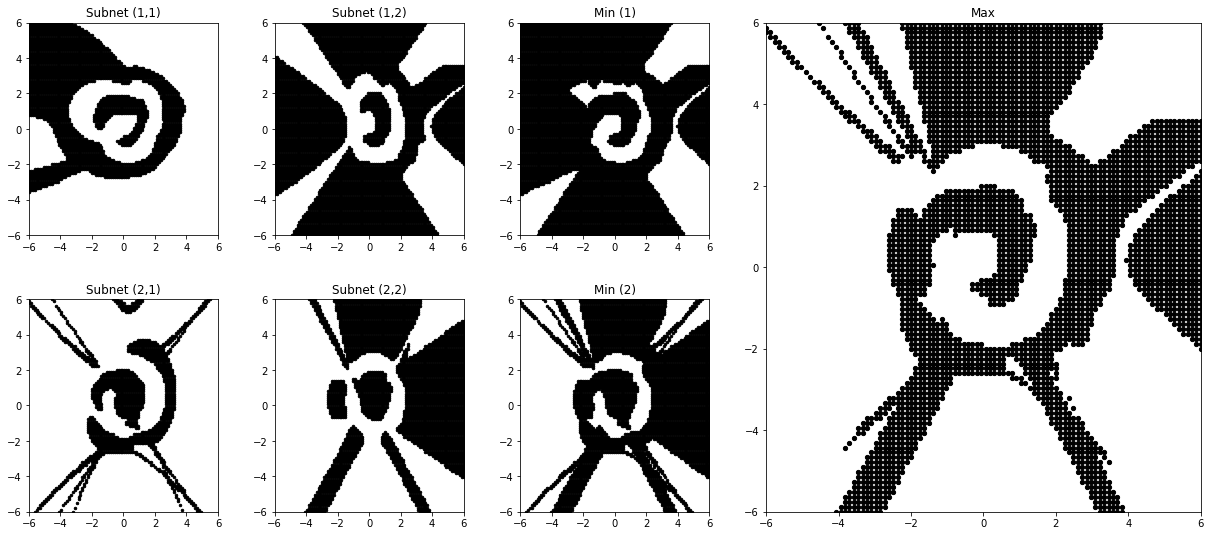

Test Error with 2 split: 0.1528


Early Stop 2080 | T 0.1040 | V 0.1270:  57%|█████▋    | 2280/4000 [00:42<00:31, 54.09epoch/s]
Early Stop 1680 | T 0.1144 | V 0.1415:  47%|████▋     | 1880/4000 [00:42<00:48, 43.82epoch/s]
Early Stop 1510 | T 0.0809 | V 0.0966:  43%|████▎     | 1710/4000 [00:40<00:53, 42.52epoch/s]
Early Stop  770 | T 0.1121 | V 0.1363:  24%|██▍       | 970/4000 [00:24<01:18, 38.80epoch/s]
Early Stop 1740 | T 0.1115 | V 0.1468:  48%|████▊     | 1940/4000 [00:42<00:45, 45.38epoch/s]
Early Stop 1510 | T 0.0734 | V 0.0841:  43%|████▎     | 1710/4000 [00:34<00:46, 49.31epoch/s]
Early Stop 1720 | T 0.0709 | V 0.0776:  48%|████▊     | 1920/4000 [00:42<00:46, 45.19epoch/s]
Early Stop 1060 | T 0.1043 | V 0.1153:  32%|███▏      | 1260/4000 [00:34<01:14, 36.81epoch/s]
Early Stop 1780 | T 0.0829 | V 0.0872:  50%|████▉     | 1980/4000 [00:53<00:54, 36.77epoch/s]


Max Training time for 3 split:   53 s


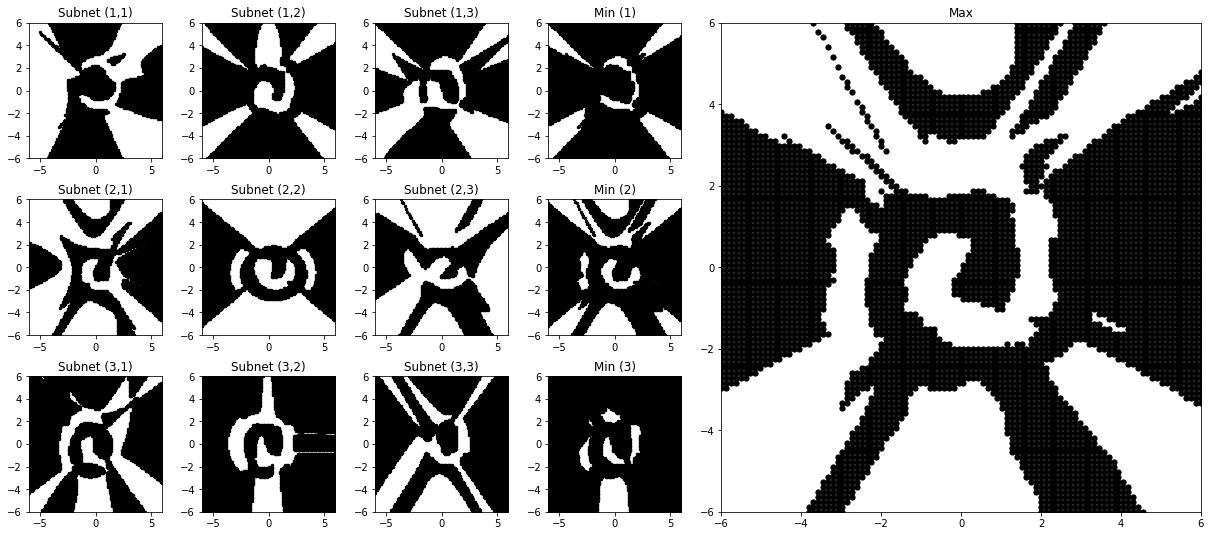

Test Error with 3 split: 0.1769


In [6]:
visualize_minmax_task(parallel=False)

In [5]:
calculate_minmax_training_time_task(parallel=False)

Early Stop 1370 | T 0.0925 | V 0.1124:  39%|███▉      | 1570/4000 [01:03<01:37, 24.82epoch/s]
Early Stop  400 | T 0.1423 | V 0.1713:  15%|█▌        | 600/4000 [00:19<01:52, 30.12epoch/s]
Early Stop 1500 | T 0.1171 | V 0.1394:  42%|████▎     | 1700/4000 [00:48<01:05, 35.28epoch/s]
Early Stop 1030 | T 0.0969 | V 0.1183:  31%|███       | 1230/4000 [00:32<01:13, 37.68epoch/s]


 2 split | Random Seed  57 | Max Time   63 s | Test Error 0.1371


Early Stop  640 | T 0.1070 | V 0.1399:  21%|██        | 840/4000 [00:23<01:27, 36.26epoch/s]
Early Stop 1700 | T 0.0705 | V 0.0827:  48%|████▊     | 1900/4000 [01:02<01:09, 30.36epoch/s]
Early Stop  220 | T 0.1489 | V 0.2190:  10%|█         | 420/4000 [00:16<02:23, 24.90epoch/s]
Early Stop  460 | T 0.1081 | V 0.1325:  16%|█▋        | 660/4000 [00:28<02:23, 23.35epoch/s]


 2 split | Random Seed  79 | Max Time   62 s | Test Error 0.1520


Early Stop  940 | T 0.0928 | V 0.1129:  28%|██▊       | 1140/4000 [00:37<01:34, 30.28epoch/s]
Early Stop 1130 | T 0.1056 | V 0.1305:  33%|███▎      | 1330/4000 [00:38<01:17, 34.62epoch/s]
Early Stop  220 | T 0.1135 | V 0.2187:  10%|█         | 420/4000 [00:10<01:27, 40.82epoch/s]
Early Stop 1770 | T 0.0815 | V 0.0971:  49%|████▉     | 1970/4000 [00:53<00:55, 36.69epoch/s]


 2 split | Random Seed 131 | Max Time   53 s | Test Error 0.1301


Early Stop  440 | T 0.0978 | V 0.1179:  16%|█▌        | 640/4000 [00:18<01:39, 33.89epoch/s]
Early Stop 1040 | T 0.1007 | V 0.1665:  31%|███       | 1240/4000 [00:34<01:17, 35.78epoch/s]
Early Stop 1440 | T 0.1047 | V 0.1267:  41%|████      | 1640/4000 [00:53<01:16, 30.94epoch/s]
Early Stop  930 | T 0.0985 | V 0.1172:  28%|██▊       | 1130/4000 [00:33<01:24, 34.12epoch/s]


 2 split | Random Seed 157 | Max Time   53 s | Test Error 0.1287


Early Stop 1190 | T 0.1181 | V 0.1359:  35%|███▍      | 1390/4000 [00:40<01:16, 34.32epoch/s]
Early Stop 2690 | T 0.0845 | V 0.1109:  72%|███████▏  | 2890/4000 [01:30<00:34, 31.92epoch/s]
Early Stop  780 | T 0.1145 | V 0.1362:  24%|██▍       | 980/4000 [00:28<01:27, 34.58epoch/s]
Early Stop  930 | T 0.1139 | V 0.1530:  28%|██▊       | 1130/4000 [00:32<01:21, 35.15epoch/s]


 2 split | Random Seed 201 | Max Time   90 s | Test Error 0.1300
! 2 split | Avg Max Time   64 s | Avg Test Error 0.1356


Early Stop 2110 | T 0.0911 | V 0.0993:  58%|█████▊    | 2310/4000 [00:45<00:33, 50.61epoch/s]
Early Stop  640 | T 0.0975 | V 0.1100:  21%|██        | 840/4000 [00:16<01:03, 49.71epoch/s]
Early Stop  700 | T 0.1242 | V 0.1408:  22%|██▎       | 900/4000 [00:17<01:00, 50.93epoch/s]
Early Stop  460 | T 0.1012 | V 0.0957:  16%|█▋        | 660/4000 [00:12<01:04, 51.47epoch/s]
Early Stop 1950 | T 0.0745 | V 0.0790:  54%|█████▍    | 2150/4000 [00:41<00:36, 51.28epoch/s]
Early Stop 2310 | T 0.0764 | V 0.0855:  63%|██████▎   | 2510/4000 [00:53<00:31, 47.29epoch/s]
Early Stop 1500 | T 0.1089 | V 0.1220:  42%|████▎     | 1700/4000 [00:35<00:47, 48.30epoch/s]
Early Stop  760 | T 0.0723 | V 0.0794:  24%|██▍       | 960/4000 [00:19<01:02, 48.69epoch/s]
Early Stop  270 | T 0.1197 | V 0.1388:  12%|█▏        | 470/4000 [00:09<01:10, 49.88epoch/s]


 3 split | Random Seed  57 | Max Time   53 s | Test Error 0.1456


Early Stop  960 | T 0.1004 | V 0.1107:  29%|██▉       | 1160/4000 [00:22<00:55, 51.54epoch/s]
Early Stop  930 | T 0.0948 | V 0.1026:  28%|██▊       | 1130/4000 [00:22<00:56, 50.50epoch/s]
Early Stop  520 | T 0.1084 | V 0.1199:  18%|█▊        | 720/4000 [00:14<01:04, 50.98epoch/s]
Early Stop 1580 | T 0.1166 | V 0.1336:  44%|████▍     | 1780/4000 [00:34<00:43, 51.16epoch/s]
Early Stop 2510 | T 0.0446 | V 0.0481:  68%|██████▊   | 2710/4000 [00:52<00:24, 51.79epoch/s]
Early Stop  850 | T 0.1519 | V 0.2259:  26%|██▋       | 1050/4000 [00:20<00:57, 51.32epoch/s]
Early Stop  950 | T 0.0755 | V 0.0822:  29%|██▉       | 1150/4000 [00:23<00:57, 49.85epoch/s]
Early Stop  280 | T 0.1166 | V 0.1365:  12%|█▏        | 480/4000 [00:09<01:09, 50.38epoch/s]
Early Stop  720 | T 0.0814 | V 0.0836:  23%|██▎       | 920/4000 [00:17<00:59, 51.64epoch/s]


 3 split | Random Seed  79 | Max Time   52 s | Test Error 0.1281


Early Stop 1020 | T 0.0734 | V 0.0799:  30%|███       | 1220/4000 [00:23<00:53, 51.55epoch/s]
Early Stop 1150 | T 0.0963 | V 0.1017:  34%|███▍      | 1350/4000 [00:26<00:51, 51.31epoch/s]
Early Stop  350 | T 0.0921 | V 0.1100:  14%|█▍        | 550/4000 [00:10<01:06, 51.71epoch/s]
Early Stop  540 | T 0.1354 | V 0.1677:  18%|█▊        | 740/4000 [00:14<01:03, 51.00epoch/s]
Early Stop  410 | T 0.1318 | V 0.1619:  15%|█▌        | 610/4000 [00:11<01:06, 50.89epoch/s]
Early Stop  630 | T 0.1047 | V 0.1389:  21%|██        | 830/4000 [00:15<01:01, 51.95epoch/s]
Early Stop 1460 | T 0.0827 | V 0.0862:  42%|████▏     | 1660/4000 [00:36<00:52, 44.90epoch/s]
Early Stop  910 | T 0.1338 | V 0.1490:  28%|██▊       | 1110/4000 [00:22<00:58, 49.74epoch/s]
Early Stop  180 | T 0.1114 | V 0.1340:  10%|▉         | 380/4000 [00:07<01:10, 51.38epoch/s]


 3 split | Random Seed 131 | Max Time   36 s | Test Error 0.1477


Early Stop  930 | T 0.1170 | V 0.1557:  28%|██▊       | 1130/4000 [00:21<00:55, 51.62epoch/s]
Early Stop  850 | T 0.0757 | V 0.0815:  26%|██▋       | 1050/4000 [00:20<00:58, 50.82epoch/s]
Early Stop  600 | T 0.0865 | V 0.0959:  20%|██        | 800/4000 [00:15<01:00, 53.20epoch/s]
Early Stop 1550 | T 0.0336 | V 0.0367:  44%|████▍     | 1750/4000 [00:33<00:42, 52.73epoch/s]
Early Stop  880 | T 0.0932 | V 0.1206:  27%|██▋       | 1080/4000 [00:21<00:56, 51.36epoch/s]
Early Stop 2400 | T 0.0598 | V 0.0747:  65%|██████▌   | 2600/4000 [00:51<00:27, 50.56epoch/s]
Early Stop 1900 | T 0.0896 | V 0.1074:  52%|█████▎    | 2100/4000 [00:41<00:37, 50.83epoch/s]
Early Stop  860 | T 0.1131 | V 0.1416:  26%|██▋       | 1060/4000 [00:20<00:57, 51.47epoch/s]
Early Stop  540 | T 0.1133 | V 0.1561:  18%|█▊        | 740/4000 [00:14<01:04, 50.59epoch/s]


 3 split | Random Seed 157 | Max Time   51 s | Test Error 0.1637


Early Stop  700 | T 0.0908 | V 0.0964:  22%|██▎       | 900/4000 [00:17<00:59, 51.82epoch/s]
Early Stop 1530 | T 0.0478 | V 0.0504:  43%|████▎     | 1730/4000 [00:33<00:44, 51.09epoch/s]
Early Stop 1780 | T 0.0961 | V 0.1205:  50%|████▉     | 1980/4000 [00:39<00:40, 50.12epoch/s]
Early Stop 1850 | T 0.0878 | V 0.0944:  51%|█████▏    | 2050/4000 [00:38<00:36, 53.28epoch/s]
Early Stop  540 | T 0.0881 | V 0.1006:  18%|█▊        | 740/4000 [00:13<01:00, 54.04epoch/s]
Early Stop 1110 | T 0.0899 | V 0.1080:  33%|███▎      | 1310/4000 [00:25<00:52, 50.83epoch/s]
Early Stop  780 | T 0.0754 | V 0.0809:  24%|██▍       | 980/4000 [00:19<00:59, 50.50epoch/s]
Early Stop 1150 | T 0.0775 | V 0.0879:  34%|███▍      | 1350/4000 [00:26<00:51, 51.86epoch/s]
Early Stop  350 | T 0.1081 | V 0.1176:  14%|█▍        | 550/4000 [00:10<01:08, 50.27epoch/s]

 3 split | Random Seed 201 | Max Time   39 s | Test Error 0.1355
! 3 split | Avg Max Time   46 s | Avg Test Error 0.1441


### With Multiprocessing

Max Training time for 2 split:   83 s


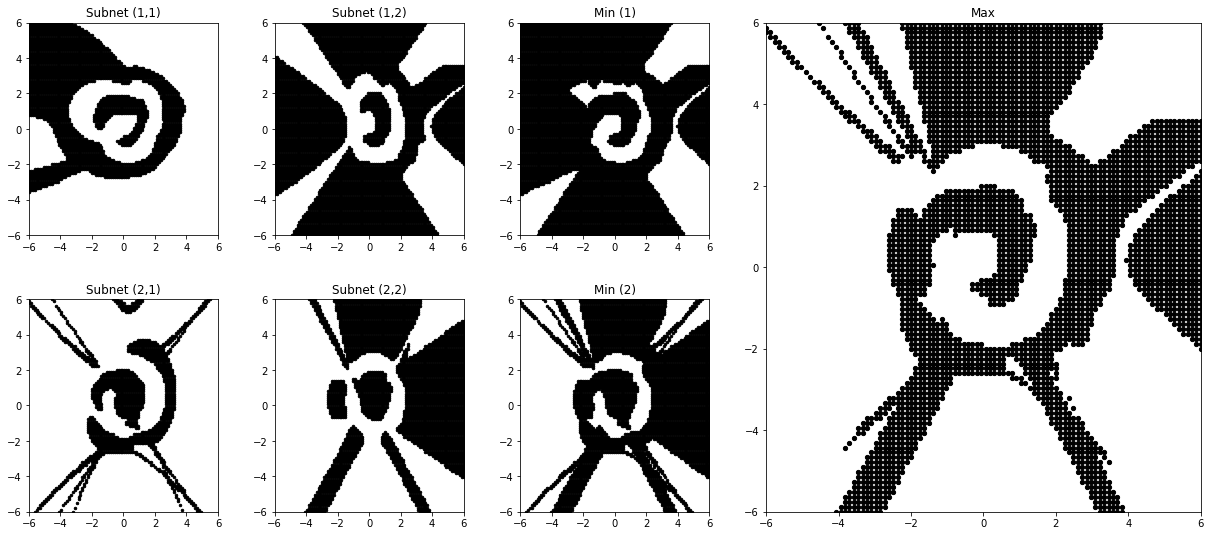

Test Error with 2 split: 0.1528
Max Training time for 3 split:  168 s


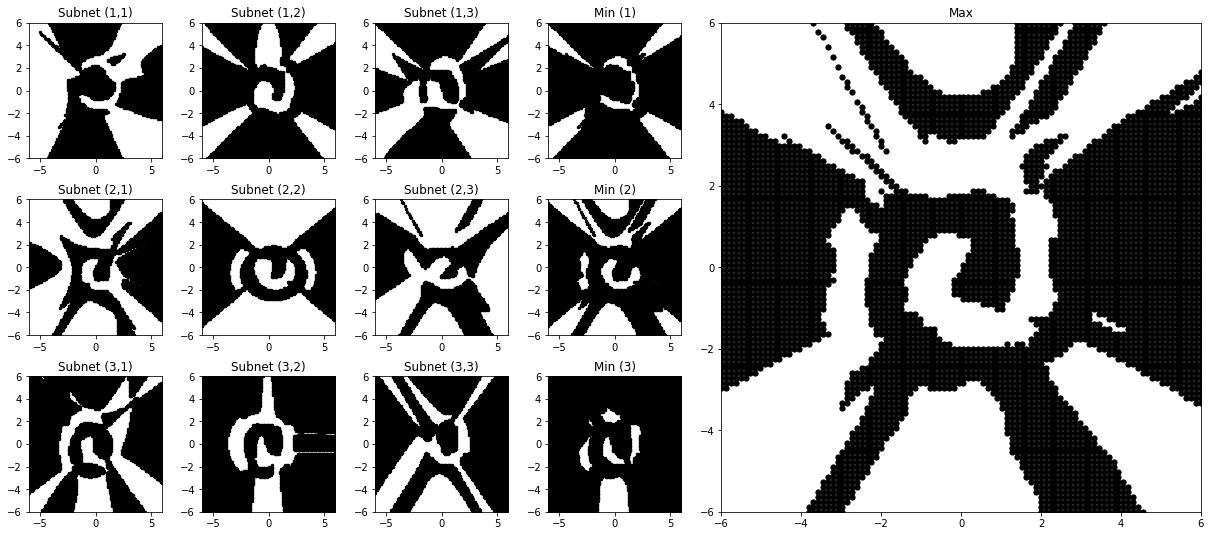

Test Error with 3 split: 0.1769


In [6]:
visualize_minmax_task(parallel=True)

In [7]:
calculate_minmax_training_time_task(parallel=True)
# Not so useful since the spec is different on different computers.

 2 split | Random Seed  57 | Max Time   90 s | Test Error 0.1371
 2 split | Random Seed  79 | Max Time   66 s | Test Error 0.1520
 2 split | Random Seed 131 | Max Time   67 s | Test Error 0.1301
 2 split | Random Seed 157 | Max Time   70 s | Test Error 0.1287
 2 split | Random Seed 201 | Max Time  106 s | Test Error 0.1300
! 2 split | Avg Max Time   80 s | Avg Test Error 0.1356
 3 split | Random Seed  57 | Max Time  123 s | Test Error 0.1456
 3 split | Random Seed  79 | Max Time  144 s | Test Error 0.1281
 3 split | Random Seed 131 | Max Time   94 s | Test Error 0.1477
 3 split | Random Seed 157 | Max Time  131 s | Test Error 0.1637
 3 split | Random Seed 201 | Max Time  124 s | Test Error 0.1355
! 3 split | Avg Max Time  123 s | Avg Test Error 0.1441
